## Imports

In [4]:
!pip install fastai
!pip install fastbook --upgrade
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [5]:
#Import fastai vision modules
from fastai.vision.all import *

## Download Data set

In [6]:
#Dataset path
path = untar_data(URLs.PETS)

## Determine Label

In [7]:
#Function for Labels
#All cat image filename start with uppercase letter

def is_cat(x): return x[0].isupper()

## Data Loader

In [8]:
dls = ImageDataLoaders.from_name_func(
    path,
    get_image_files(path),
    valid_pct = 0.2,
    seed = 42,
    label_func = is_cat,
    item_tfms = Resize(224)
)

## Model

In [9]:
#CNN

learn =cnn_learner(dls,
                   resnet34,
                   metrics = error_rate)

learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.390468,0.268985,0.111299,01:20


epoch,train_loss,valid_loss,error_rate,time
0,0.231691,0.168862,0.074087,01:50


## Image Uploader Widget

In [18]:
#Image Uploader
import ipywidgets as widgets

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

### Model Predictions

In [32]:
def pred():
  '''
  Function to convert images to ndarray and make predictions using model.
  '''  
  
  #Convert image to array
  img = PILImage.create(uploader.data[0])
  img.show()

  #Make Prediction
  is_cat,_,probs = learn.predict(img)

  print(f"Image is of a Cat: {is_cat}.")
  print(f"Probability image is a cat: {probs[1].item():.6f}")

Image is of a Cat: True.
Probability image is a cat: 1.000000


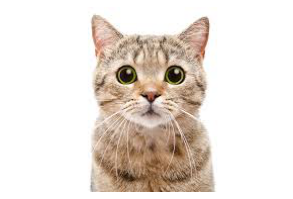

In [24]:
pred()

Image is of a Cat: True.
Probability image is a cat: 1.000000


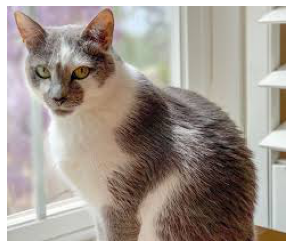

In [25]:
pred()

Image is of a Cat: True.
Probability image is a cat: 1.000000


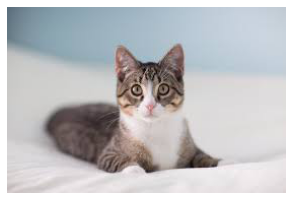

In [26]:
pred()

Image is of a Cat: False.
Probability image is a cat: 0.000056


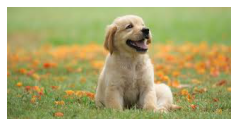

In [27]:
pred()

Image is of a Cat: False.
Probability image is a cat: 0.001552


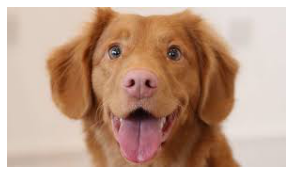

In [28]:
pred()

Image is of a Cat: False.
Probability image is a cat: 0.000081


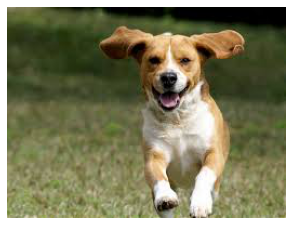

In [29]:
pred()